## Setup

In [12]:
from src.phrase_analysis import process_directory, plot_phrase_frequency_over_time_all, plot_length_distribution, analyze_files_phrase_occurrences, get_recent_contexts_all, get_per_appearance_frequency, calculate_poisson_predictions, calculate_negative_binomial_predictions, format_prediction_table, format_prediction_table
from src.regex_pattern_generator import generate_regex_patterns
from datetime import datetime

In [13]:
INAUGURATION_DATE = datetime(2025, 1, 20)
CONTEXT_WINDOW = 200 # words to display for context

In [14]:
PHRASES = ['Michael / Whatley',
 'Ted / Budd',
 'Thom Tillis',
 'Wage',
 'Trade',
 'Tax on Tips',
 'Tariff',
 'Political Violence',
 'Overtime',
 'National Guard',
 'Middle Class',
 'Memphis',
 'Manufacturing',
 'Iryna / Zarutska',
 'Immigration',
 'Housing',
 'Healthcare / Health care',
 'Gas',
 'Energy',
 'Election',
 'Economy',
 'Drug',
 'Democrat',
 'DC / Capital',
 'China',
 'Charlie / Kirk',
 'Border',
 'Biden',
 'Antifa',
 'American Dream',
 'AI / Artificial Intelligence']

SEARCH_PHRASES = generate_regex_patterns(PHRASES)

from pprint import pprint
pprint(SEARCH_PHRASES)

{'AI / Artificial Intelligence': "\\b(?:\\w+-)*(?:(?:ai|ais|ai's|ais'|artificial[\\s,\\-]+intelligence|artificial[\\s,\\-]+intelligences|artificial[\\s,\\-]+intelligence's|artificial[\\s,\\-]+intelligences'|artificials[\\s,\\-]+intelligence|artificials[\\s,\\-]+intelligences|artificials[\\s,\\-]+intelligence's|artificials[\\s,\\-]+intelligences'|artificial's[\\s,\\-]+intelligence|artificial's[\\s,\\-]+intelligences|artificial's[\\s,\\-]+intelligence's|artificial's[\\s,\\-]+intelligences'|artificials'[\\s,\\-]+intelligence|artificials'[\\s,\\-]+intelligences|artificials'[\\s,\\-]+intelligence's|artificials'[\\s,\\-]+intelligences'))(?:-\\w+)*(?=\\W|$)[.,!?;:]*",
 'American Dream': "\\b(?:\\w+-)*(?:american[\\s,\\-]+dream|american[\\s,\\-]+dreams|american[\\s,\\-]+dream's|american[\\s,\\-]+dreams'|americans[\\s,\\-]+dream|americans[\\s,\\-]+dreams|americans[\\s,\\-]+dream's|americans[\\s,\\-]+dreams'|american's[\\s,\\-]+dream|american's[\\s,\\-]+dreams|american's[\\s,\\-]+dream's|america

In [15]:
# Set the category of interest
CATEGORY_OF_INTEREST = "speech"

# Process transcripts
df = process_directory('../data-vance/processed-transcripts', SEARCH_PHRASES)
df = df.sort_values('date')

# Filter out press briefings and state of the union
df = df[df['category'] != 'press briefing']
df = df[df['category'] != 'sotu']

# Split data by date and category
category_mask = df['category'] == CATEGORY_OF_INTEREST
date_mask = df['date'] >= INAUGURATION_DATE

# Create category of interest dataframes 
df_category = df[category_mask]
df_category_pre = df[category_mask & ~date_mask]
df_category_post = df[category_mask & date_mask]

df_non_category = df[~category_mask]
df_pre = df[~date_mask]
df_post = df[date_mask]

# Print dataset statistics
print("Dataset Statistics:")

print(f"\nAll Transcripts:")
print(f"Total: {len(df)}")
print(f"Pre-inauguration: {len(df_pre)}")
print(f"Post-inauguration: {len(df_post)}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_category)}")
print(f"Pre-inauguration: {len(df_category_pre)}")
print(f"Post-inauguration: {len(df_category_post)}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Total: {len(df_non_category)}")
print(f"Pre-inauguration: {len(df_non_category[~date_mask])}")
print(f"Post-inauguration: {len(df_non_category[date_mask])}")

print("\nWord Count Statistics:")

print(f"\nAll Transcripts:")
print(f"Average length: {df['text_length'].mean():.0f} words") 

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_category['text_length'].mean():.0f} words") 

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Average length: {df_non_category['text_length'].mean():.0f} words")


print("\nDate Ranges:")

print(f"\nAll Transcripts:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")

print(f"\n{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_category['date'].min().strftime('%Y-%m-%d')} to {df_category['date'].max().strftime('%Y-%m-%d')}")

print(f"\nNon-{CATEGORY_OF_INTEREST.title()}s:")
print(f"Date range: {df_non_category['date'].min().strftime('%Y-%m-%d')} to {df_non_category['date'].max().strftime('%Y-%m-%d')}")

Categories found in directory:
- debate
- interview
- press conference
- press gaggle
- processed-transcripts
- remarks
- speech
Dataset Statistics:

All Transcripts:
Total: 93
Pre-inauguration: 10
Post-inauguration: 83

Speechs:
Total: 16
Pre-inauguration: 2
Post-inauguration: 14

Non-Speechs:
Total: 77
Pre-inauguration: 8
Post-inauguration: 69

Word Count Statistics:

All Transcripts:
Average length: 1577 words

Speechs:
Average length: 3793 words

Non-Speechs:
Average length: 1117 words

Date Ranges:

All Transcripts:
Date range: 2022-04-23 to 2025-09-21

Speechs:
Date range: 2024-07-27 to 2025-09-21

Non-Speechs:
Date range: 2022-04-23 to 2025-09-15


/var/folders/_t/ds12gpdx0qb6km94c759_z9m0000gn/T/ipykernel_54949/2890291041.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Pre-inauguration: {len(df_non_category[~date_mask])}")
/var/folders/_t/ds12gpdx0qb6km94c759_z9m0000gn/T/ipykernel_54949/2890291041.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Post-inauguration: {len(df_non_category[date_mask])}")


## Phrase Frequency Over Time

Speeches dropped off dramatically between election day and inauguration day. Non-speech transcripts mostly don't go back as far in time (need to scrape more data)


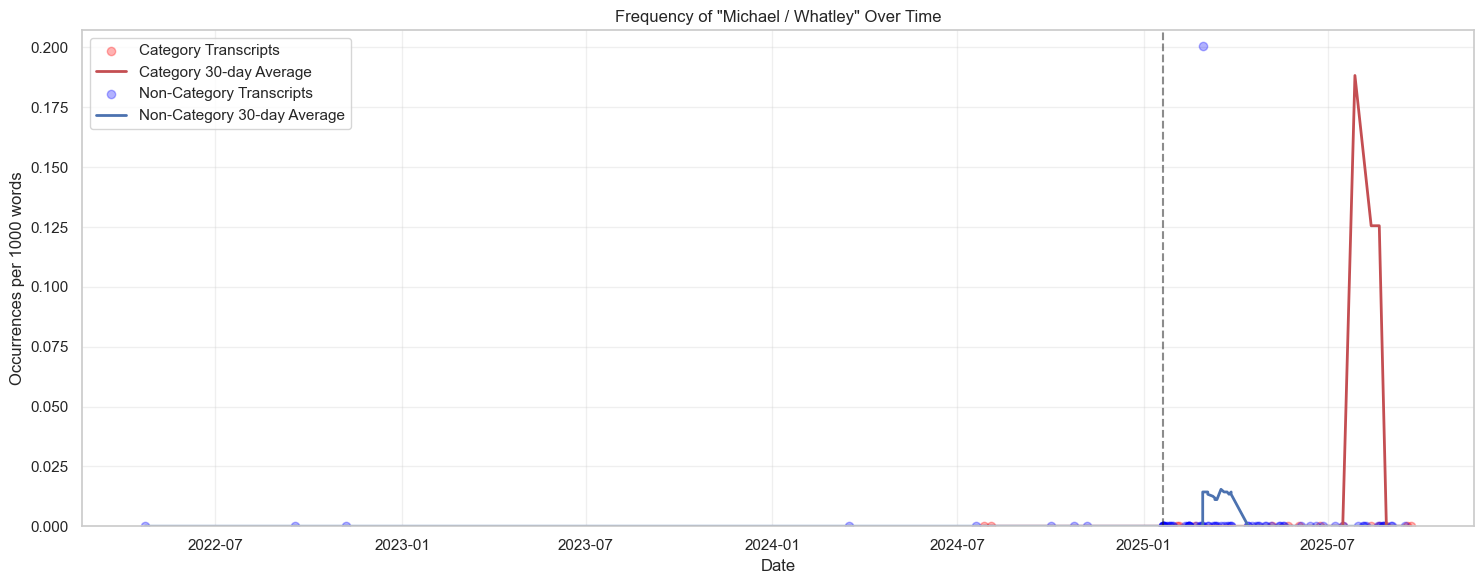


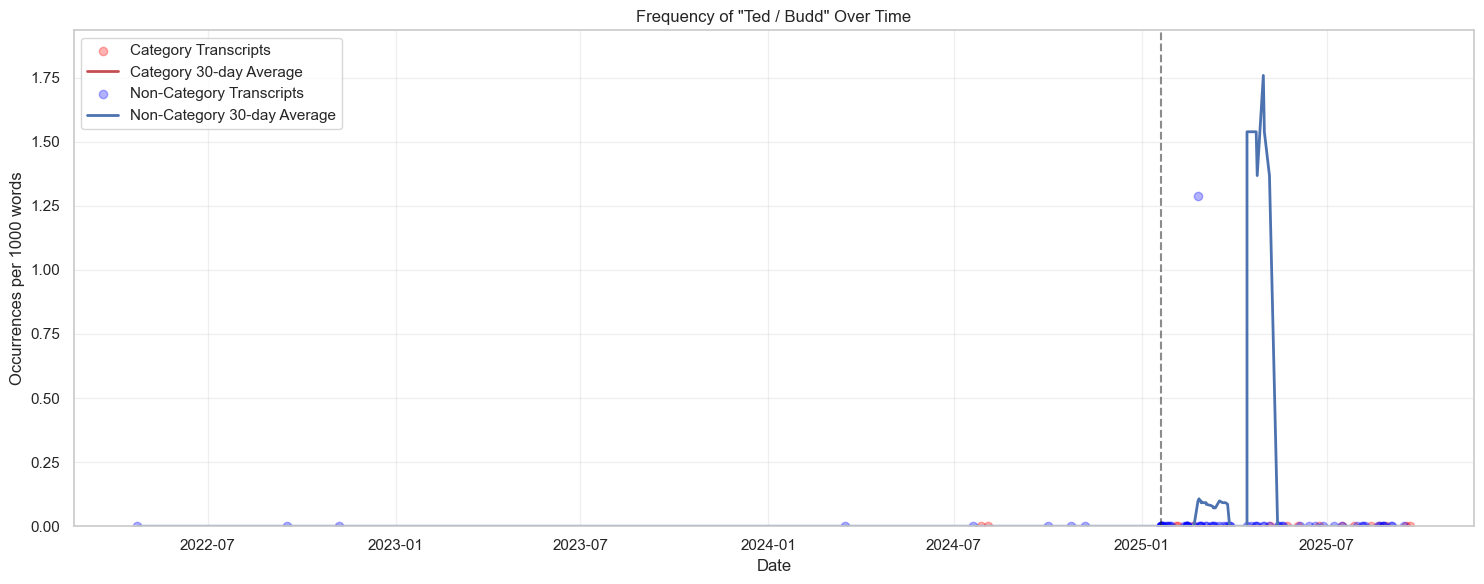

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:213: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, ymax)



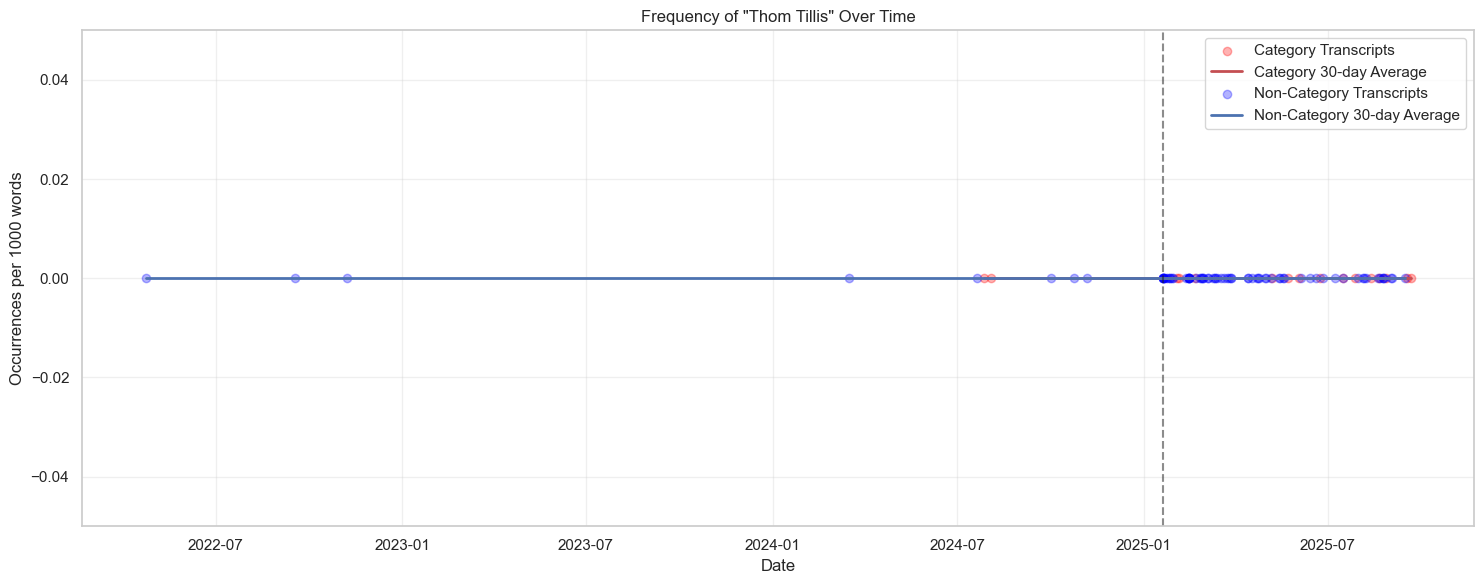


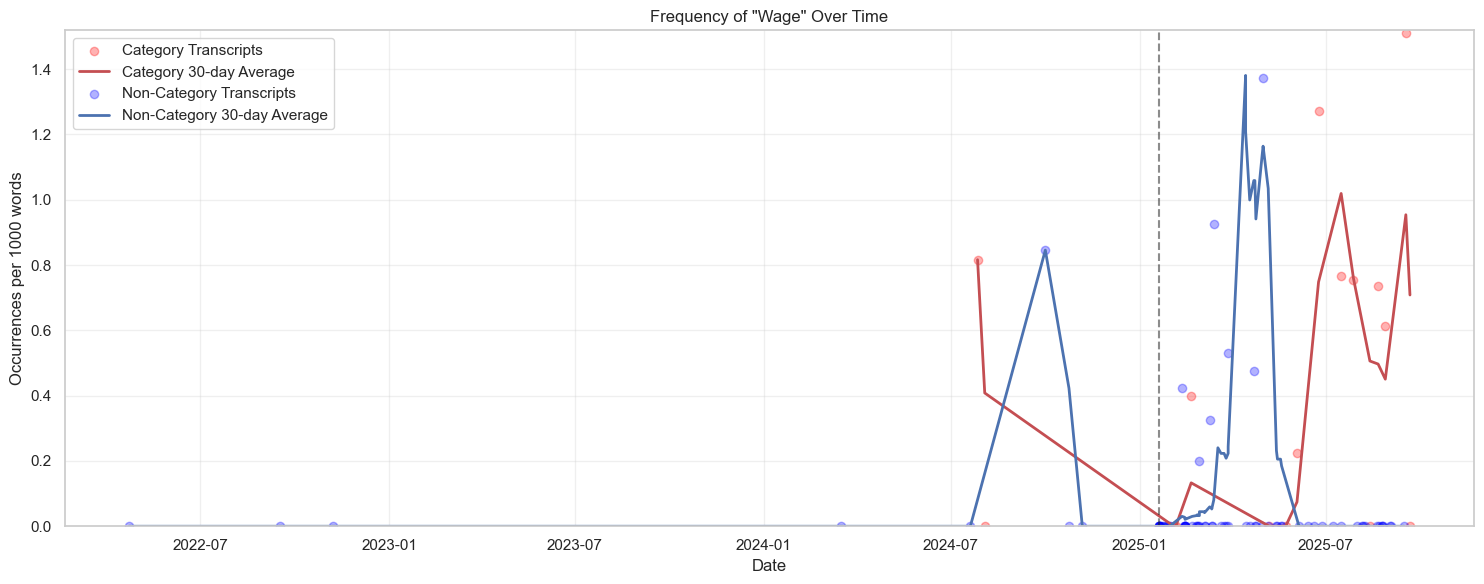


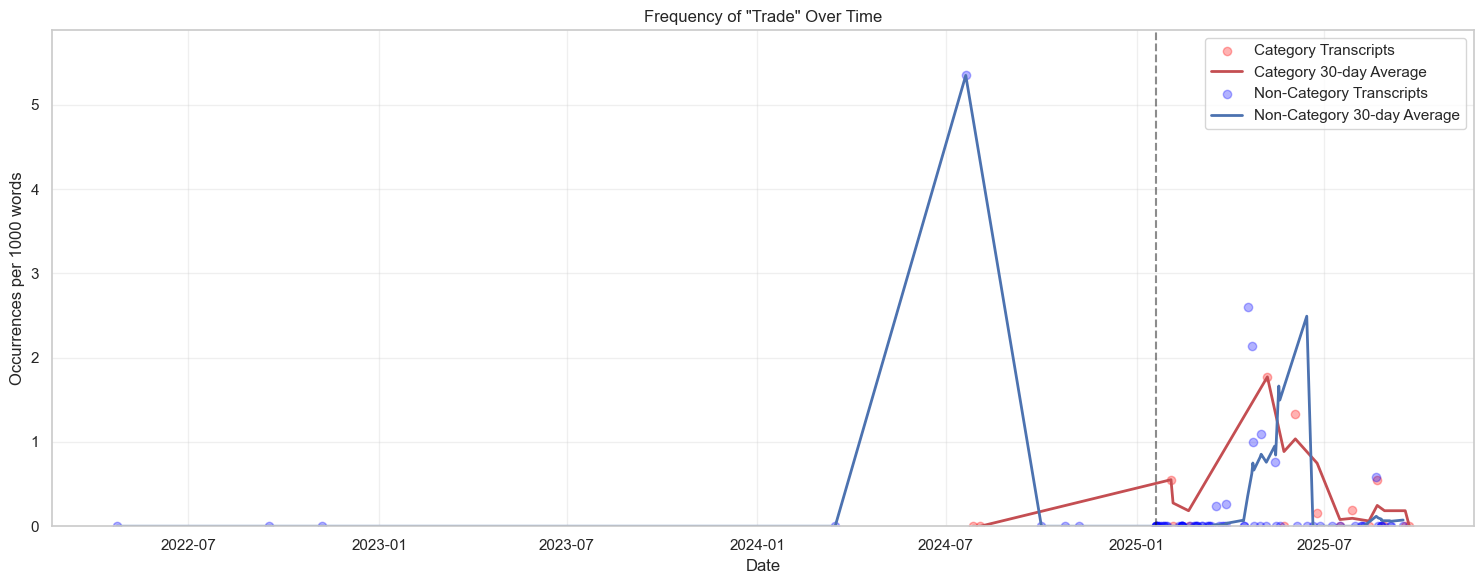


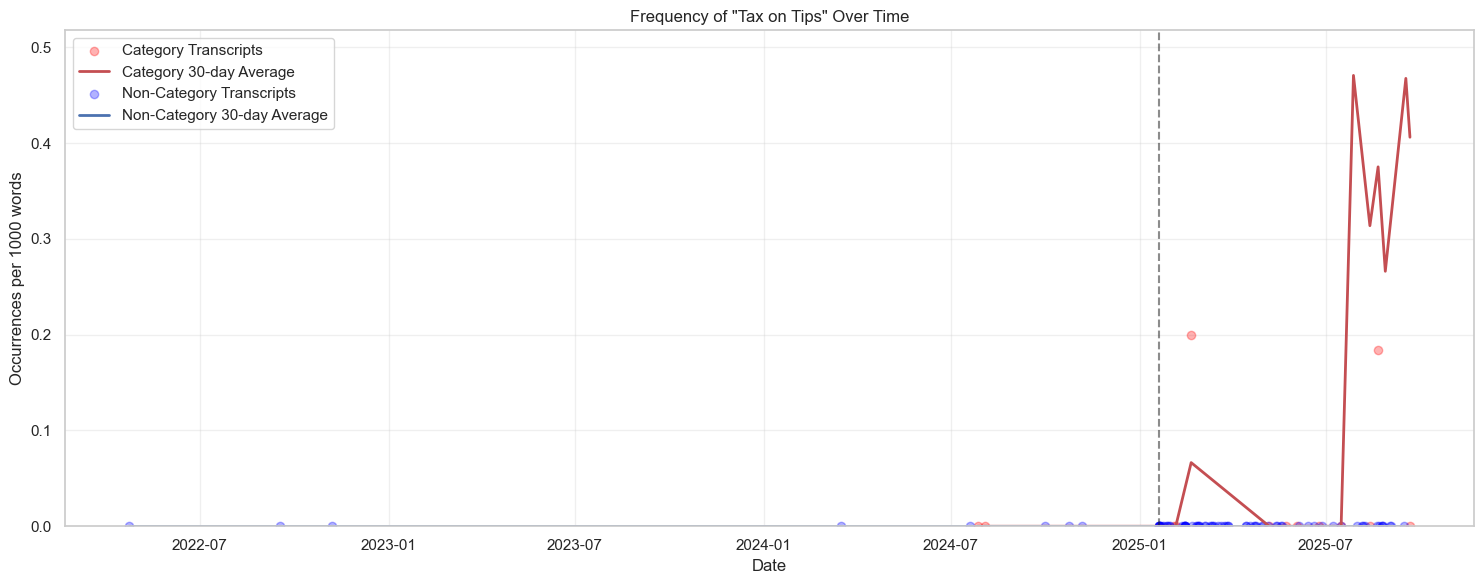


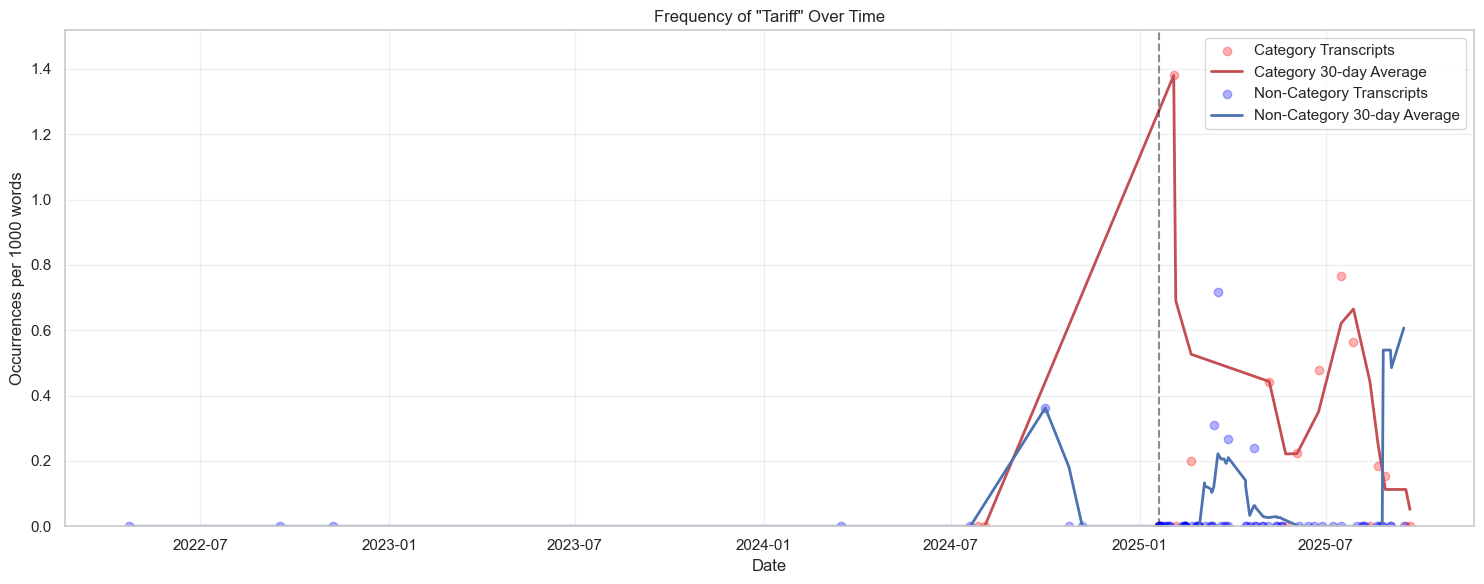


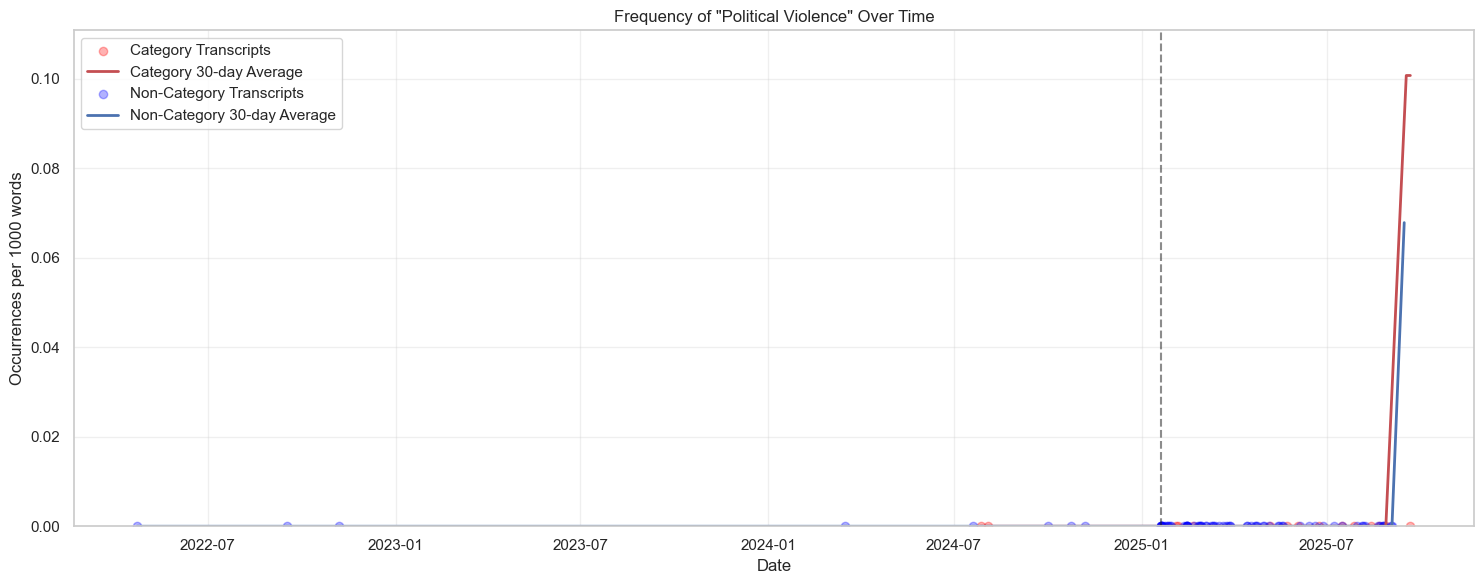


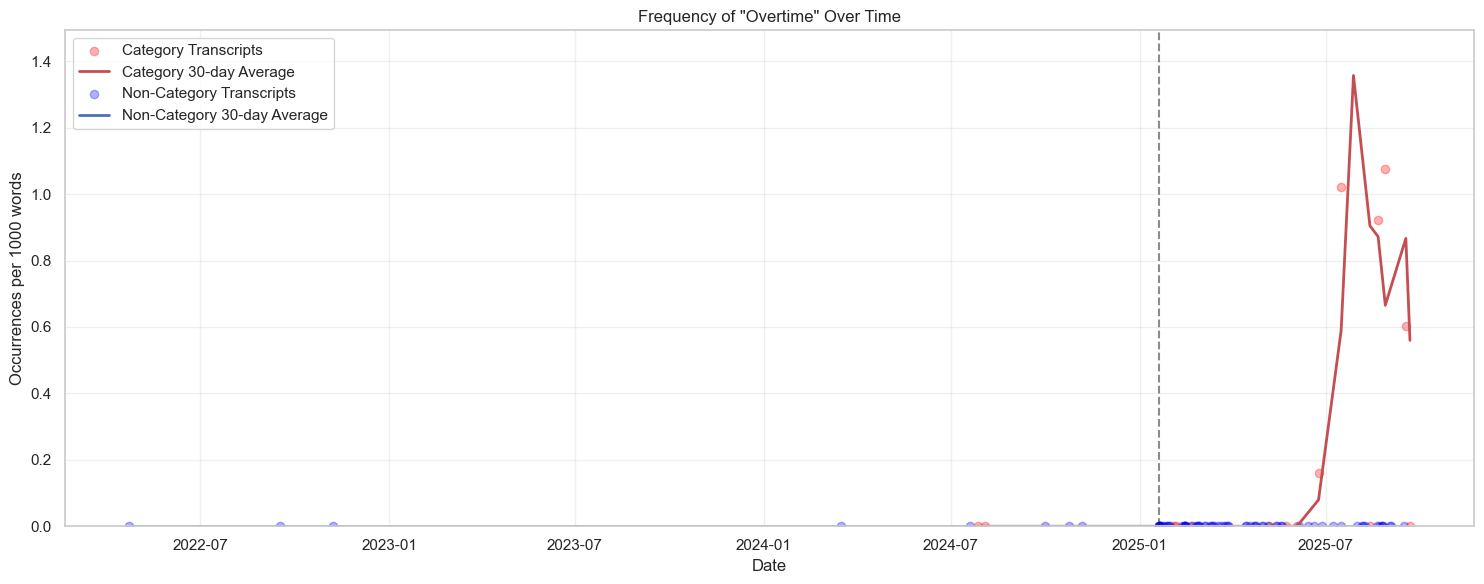


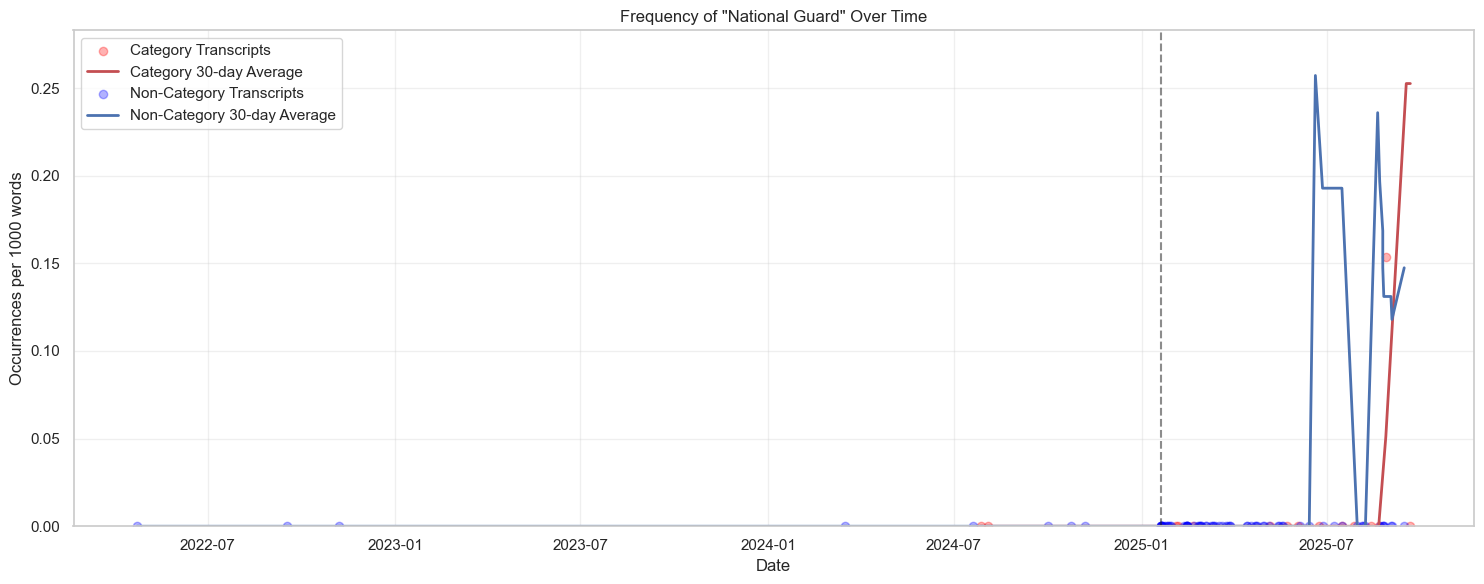


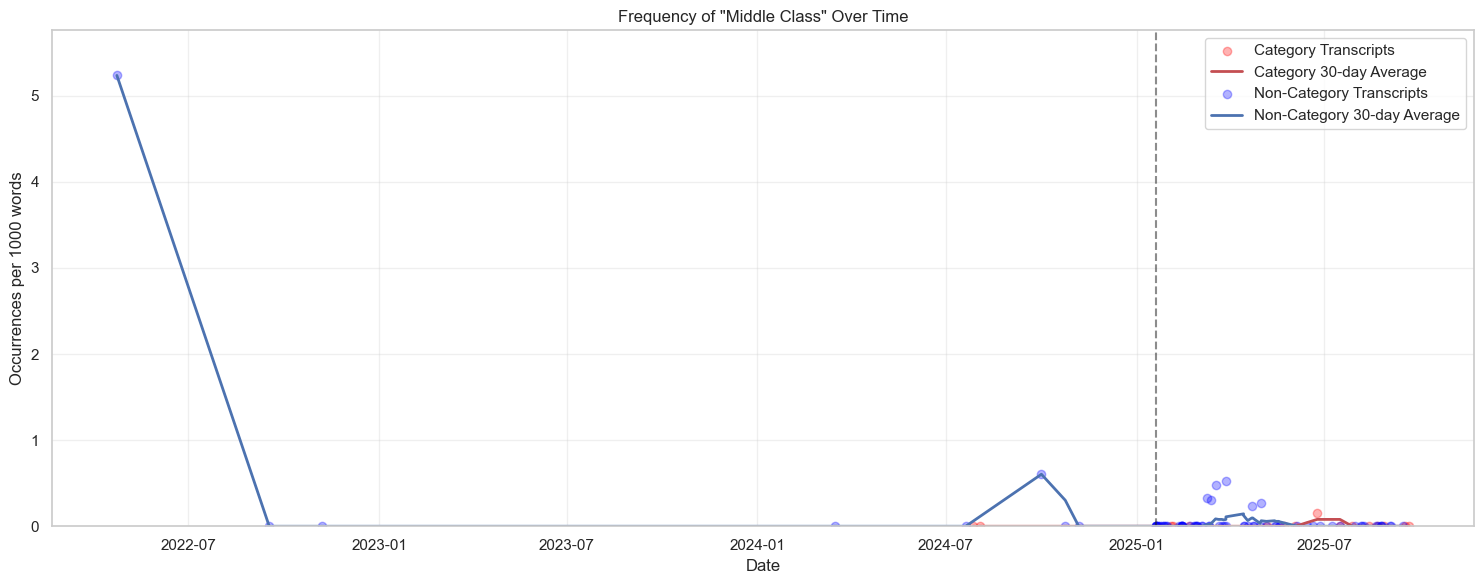


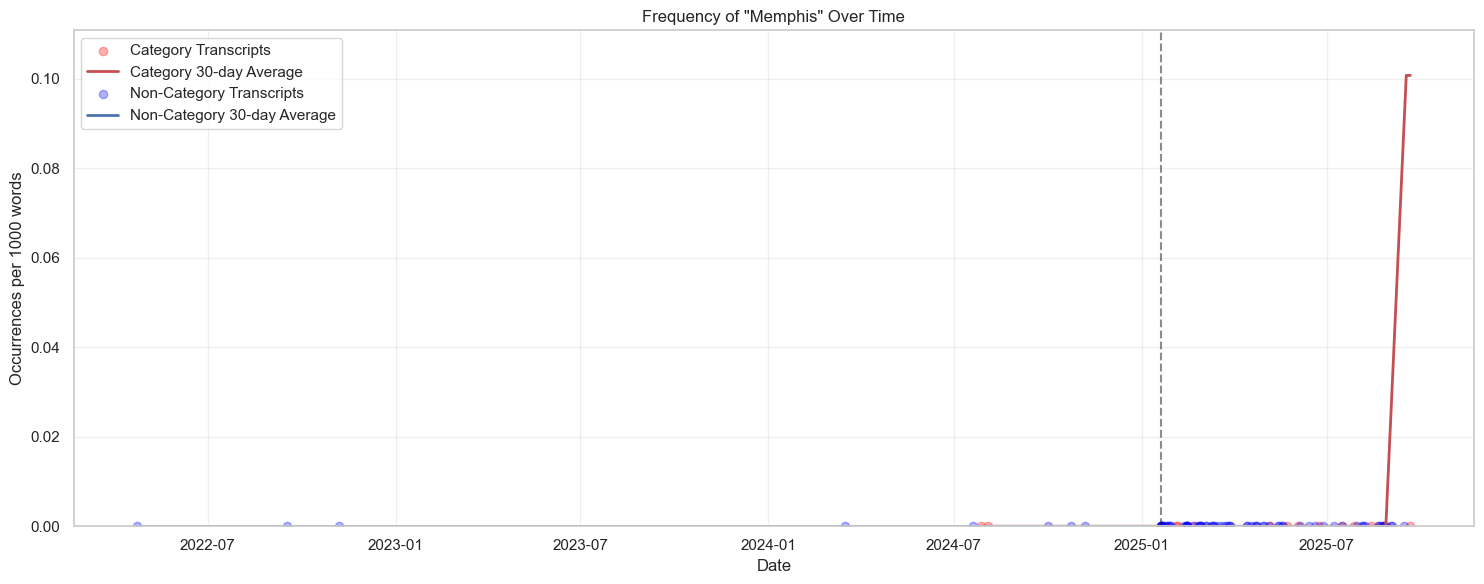


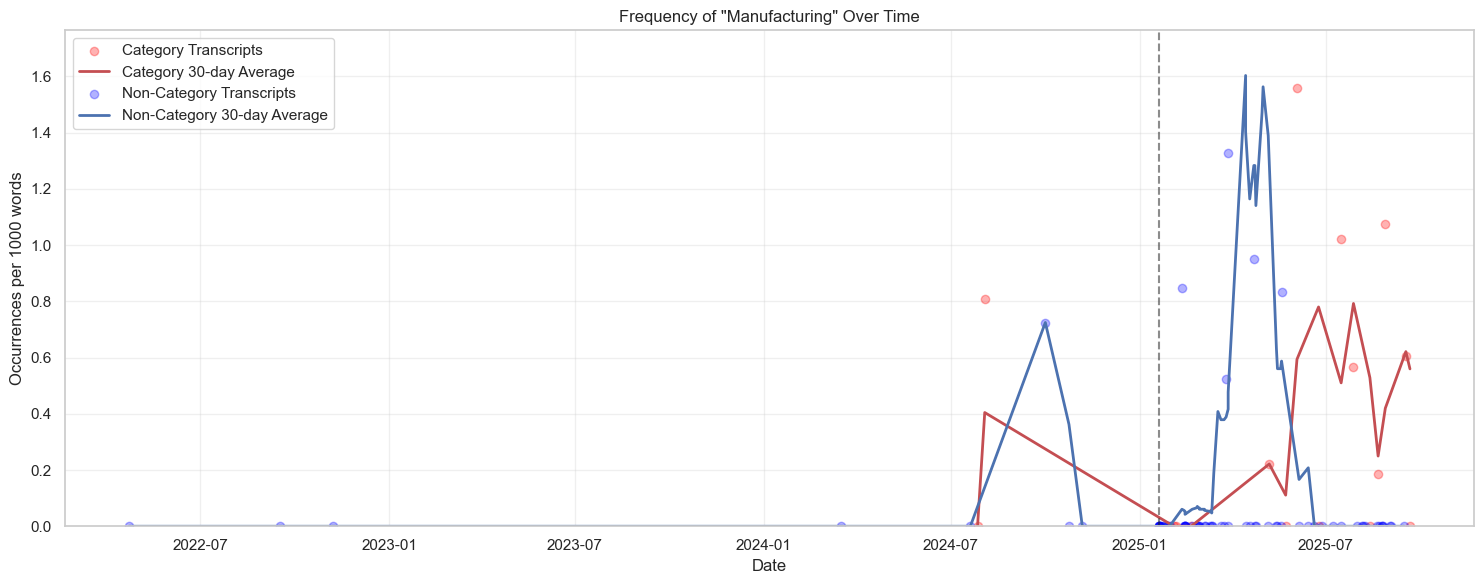

/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:213: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(0, ymax)



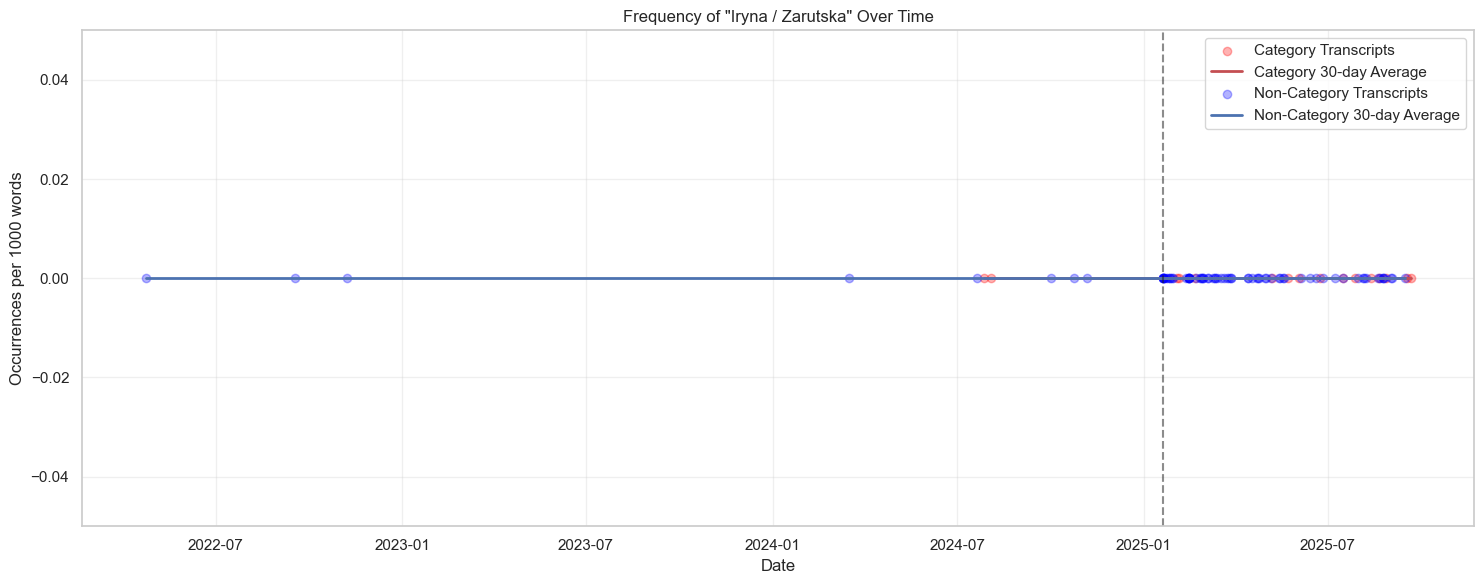


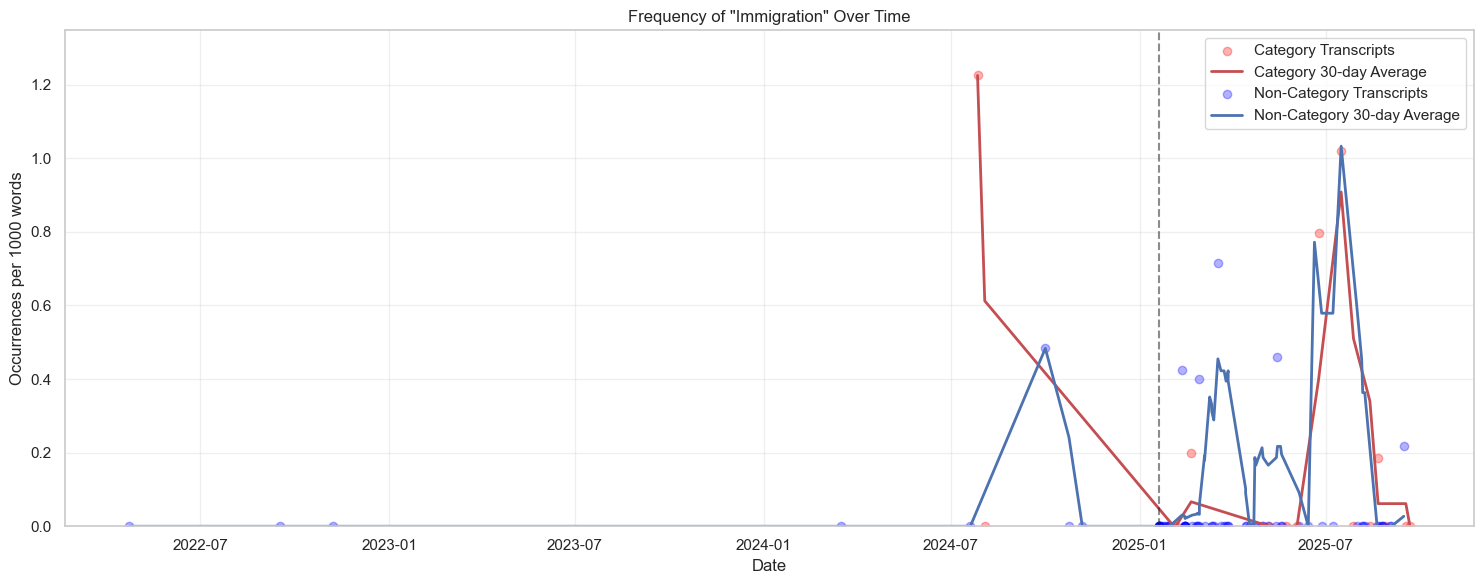


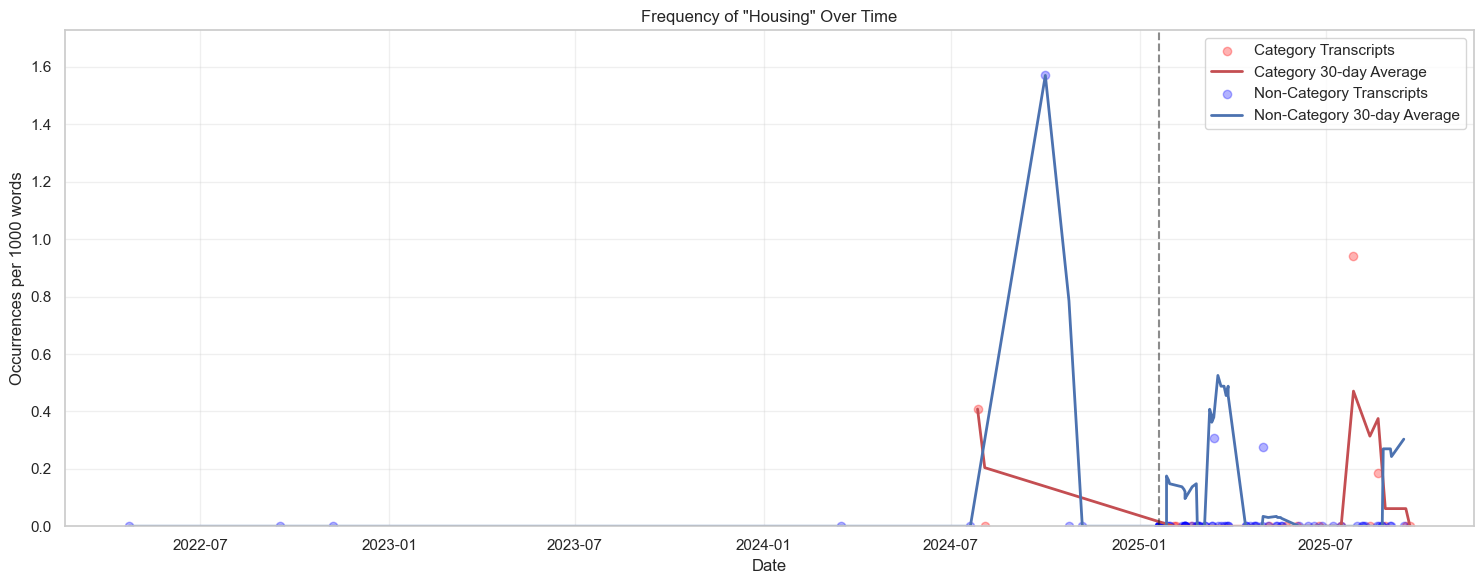


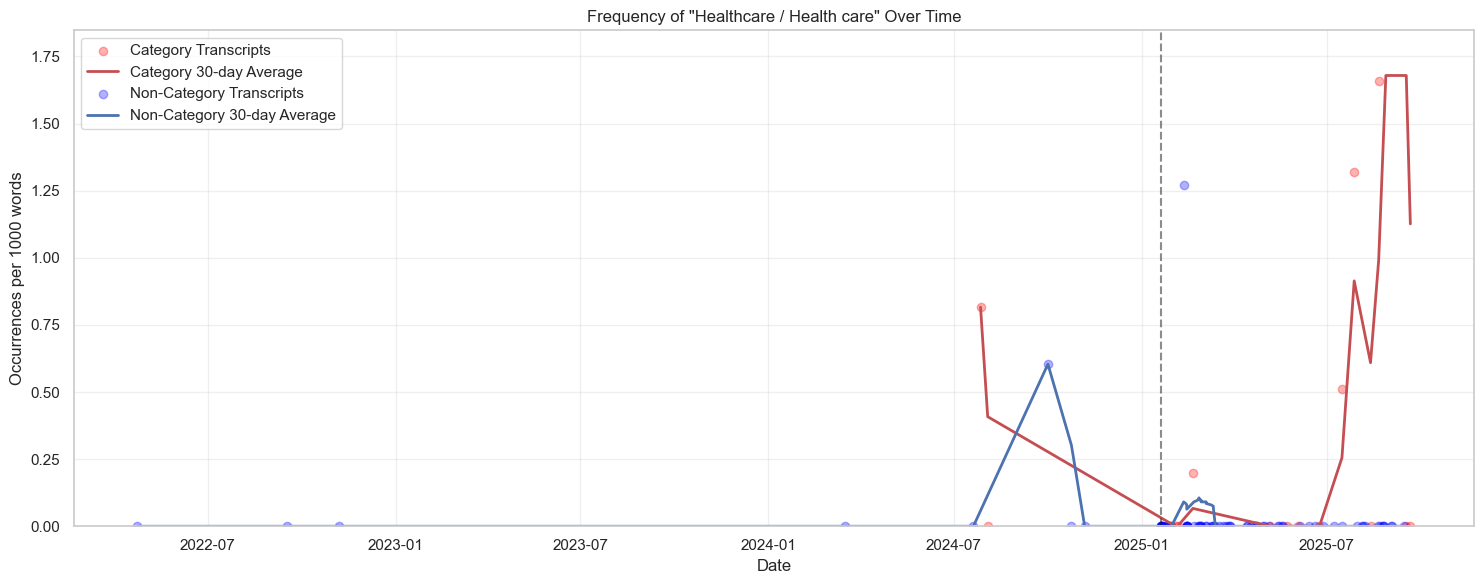


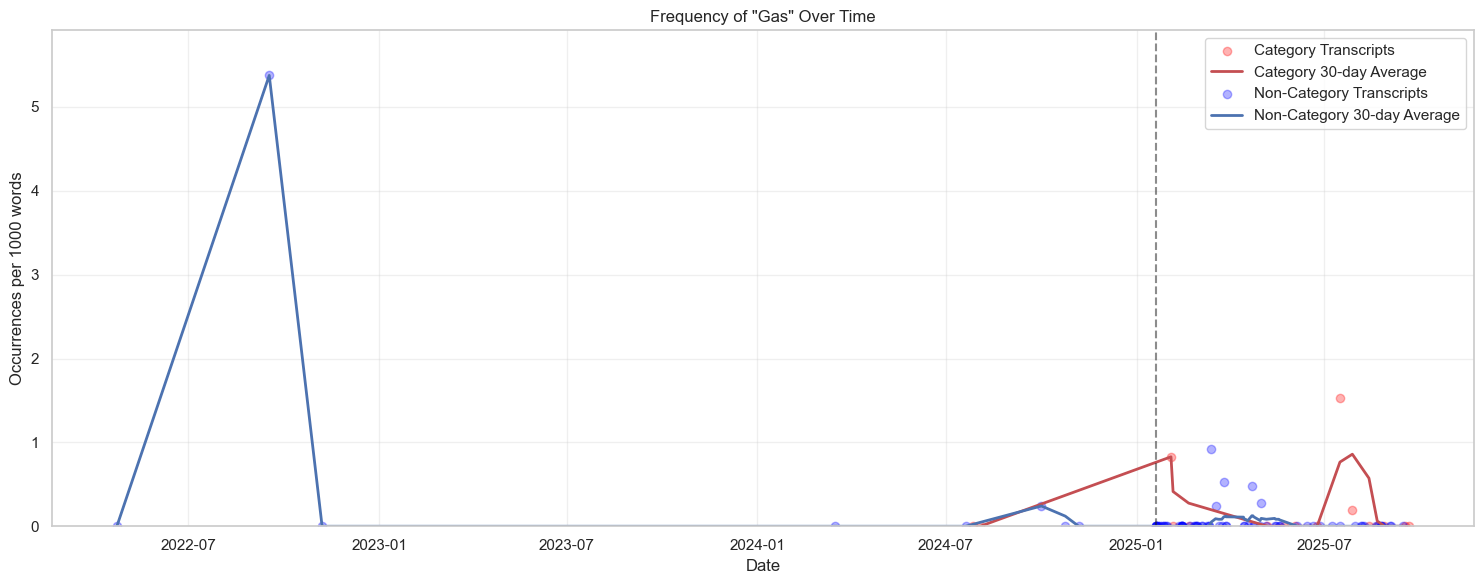


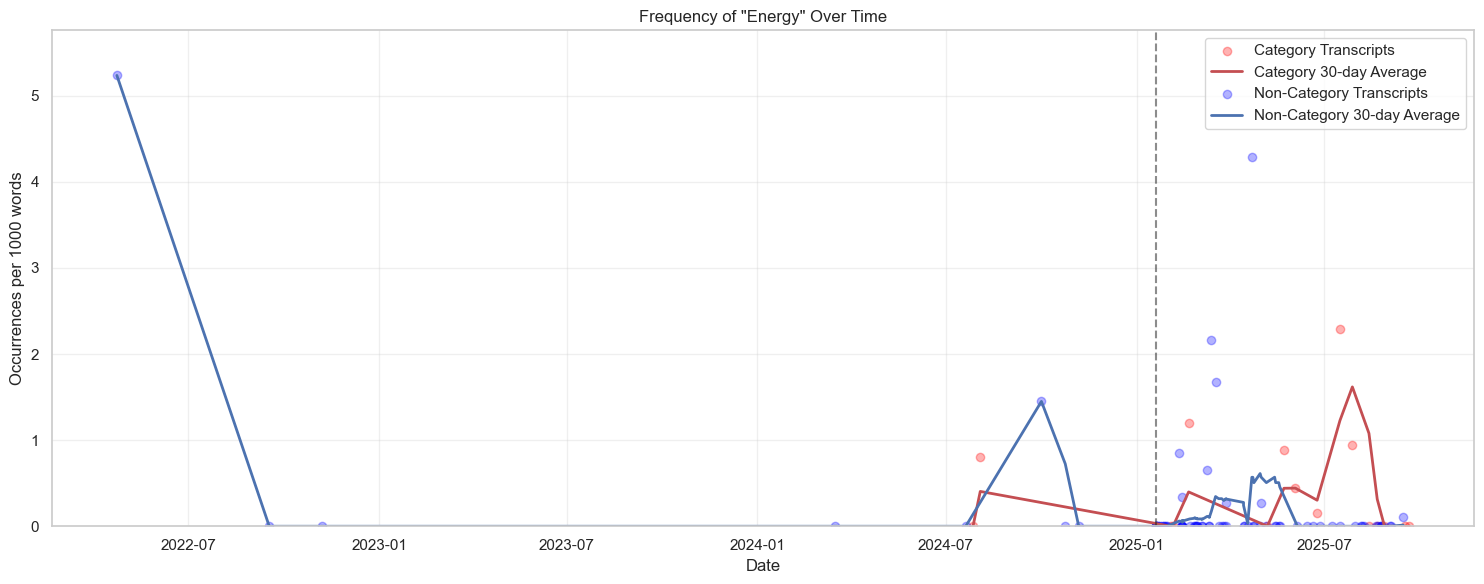


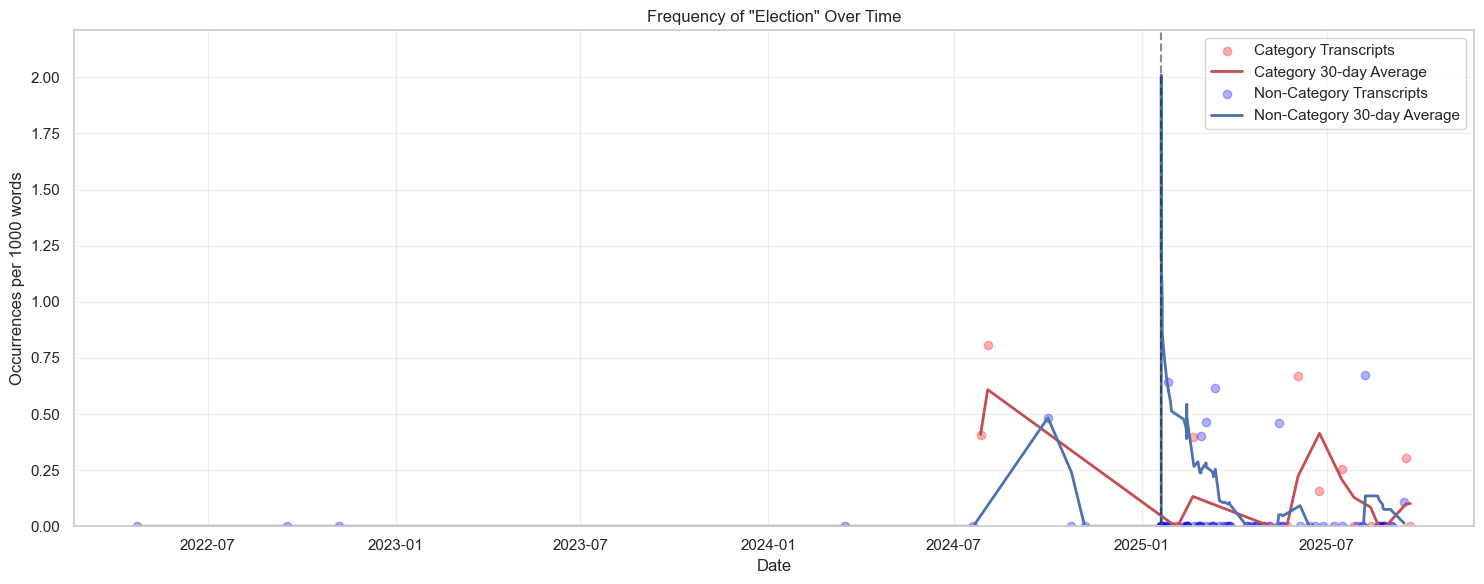


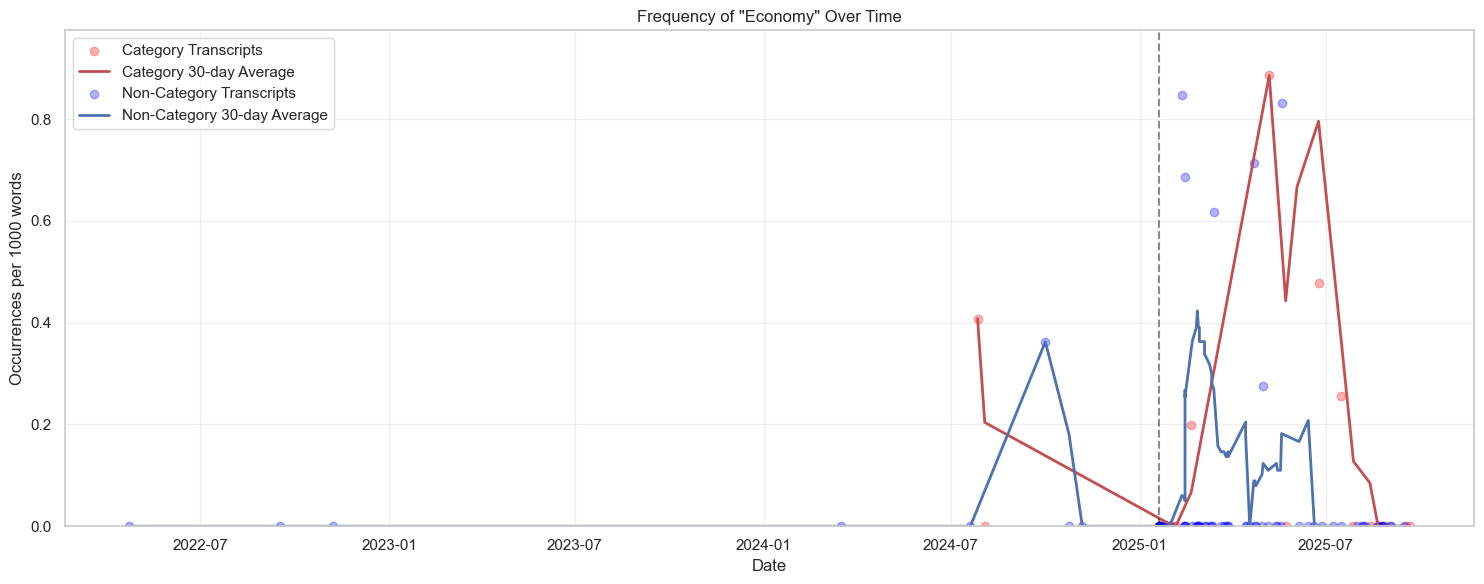


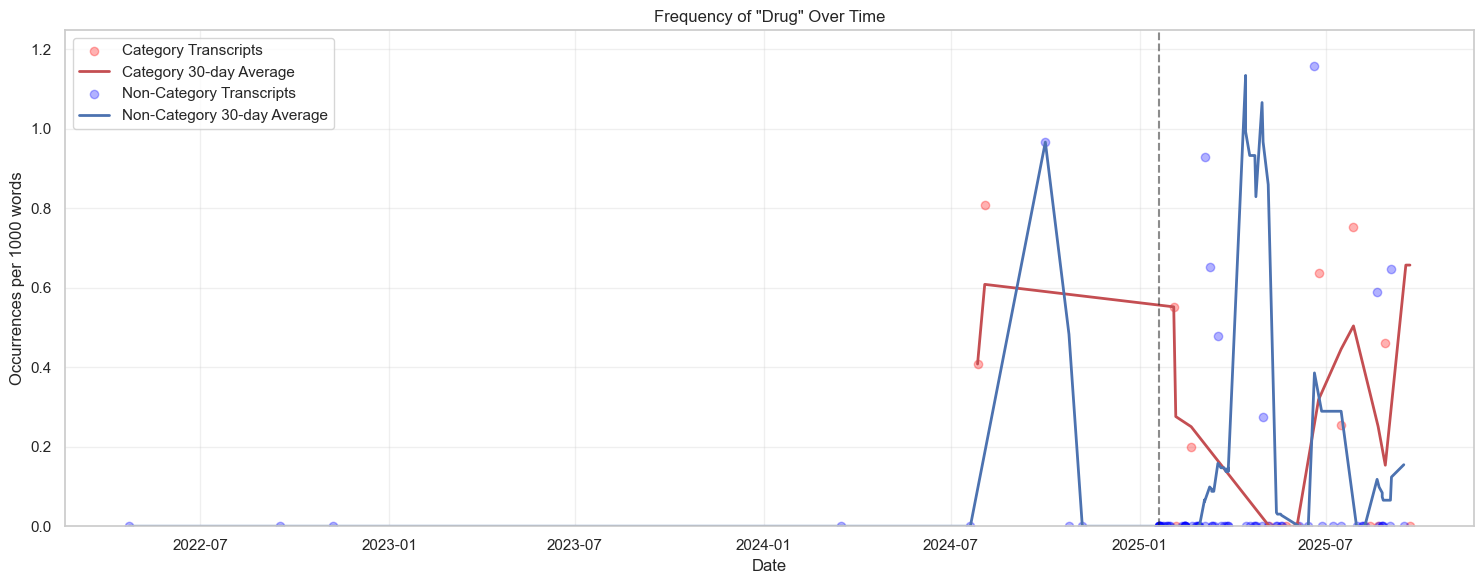


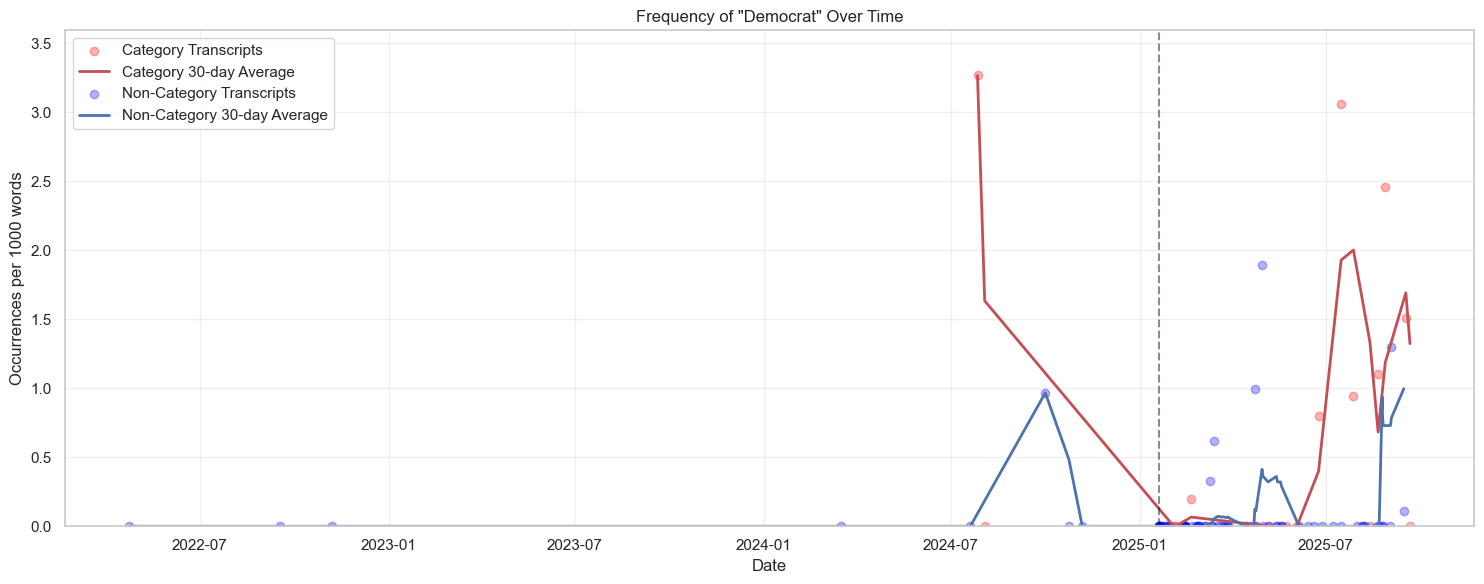


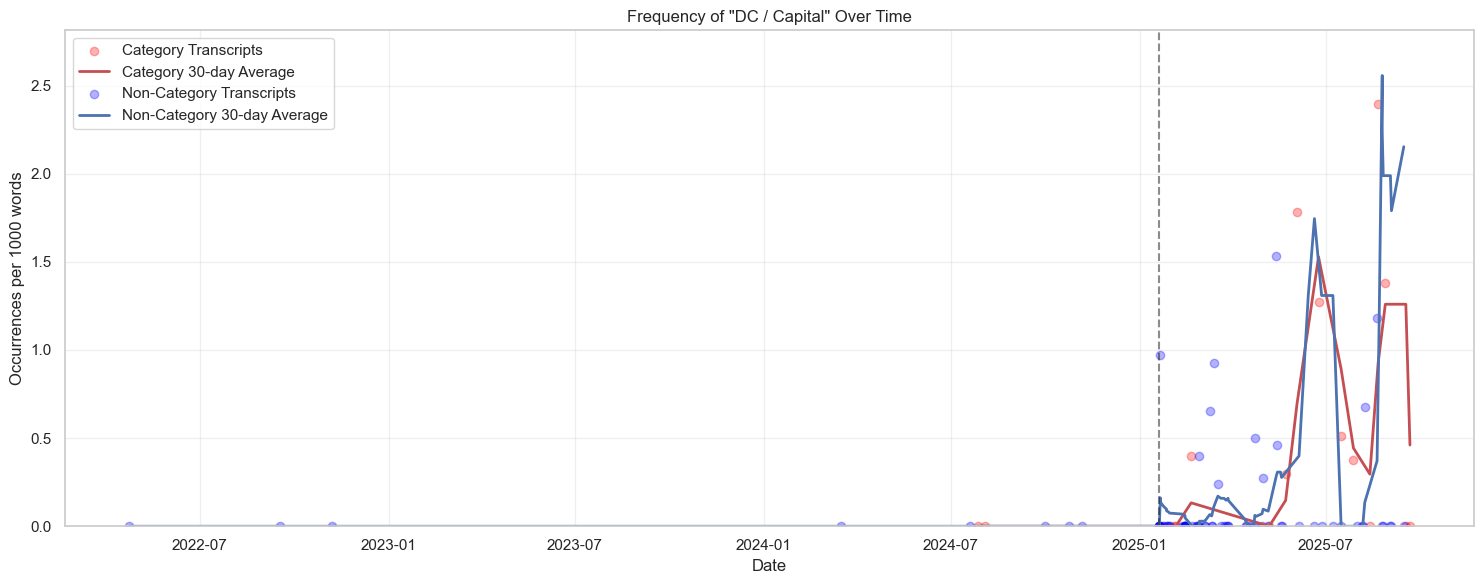


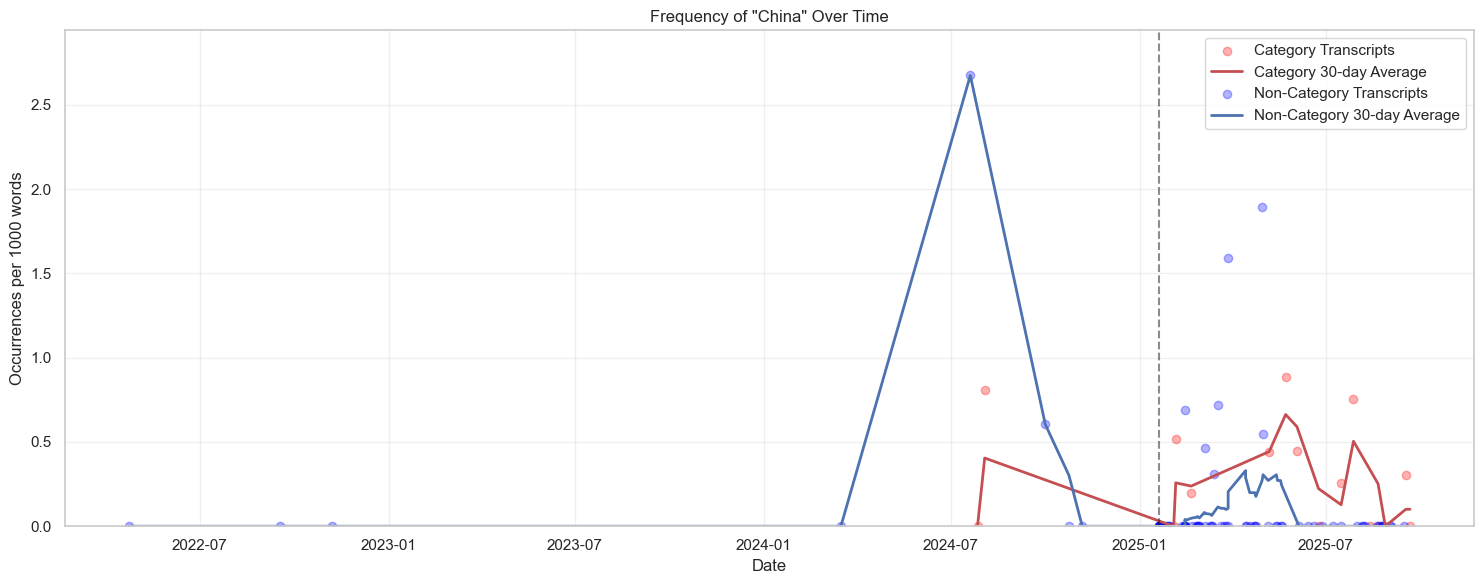


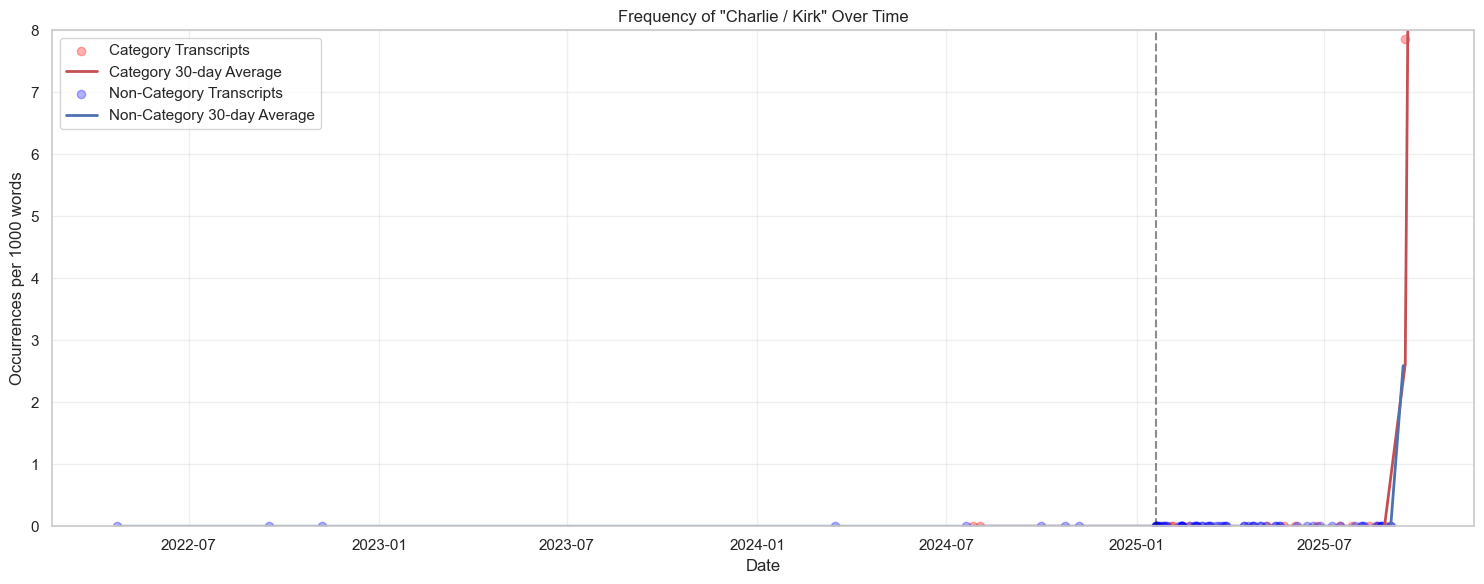


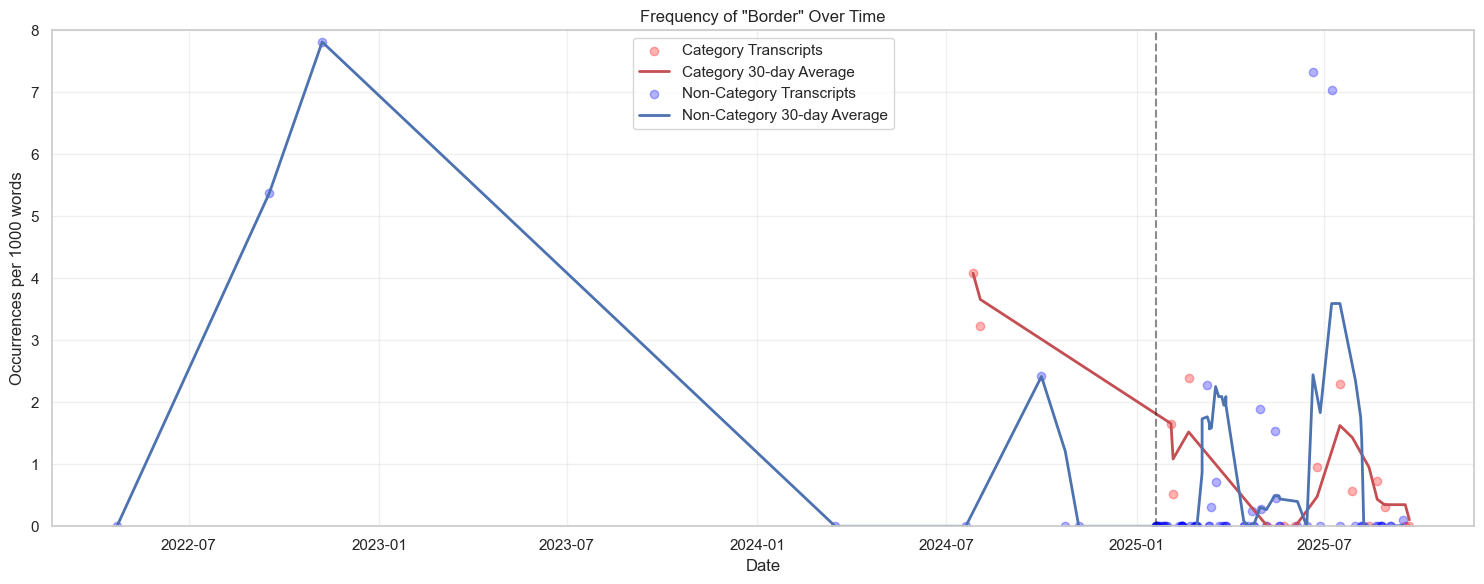


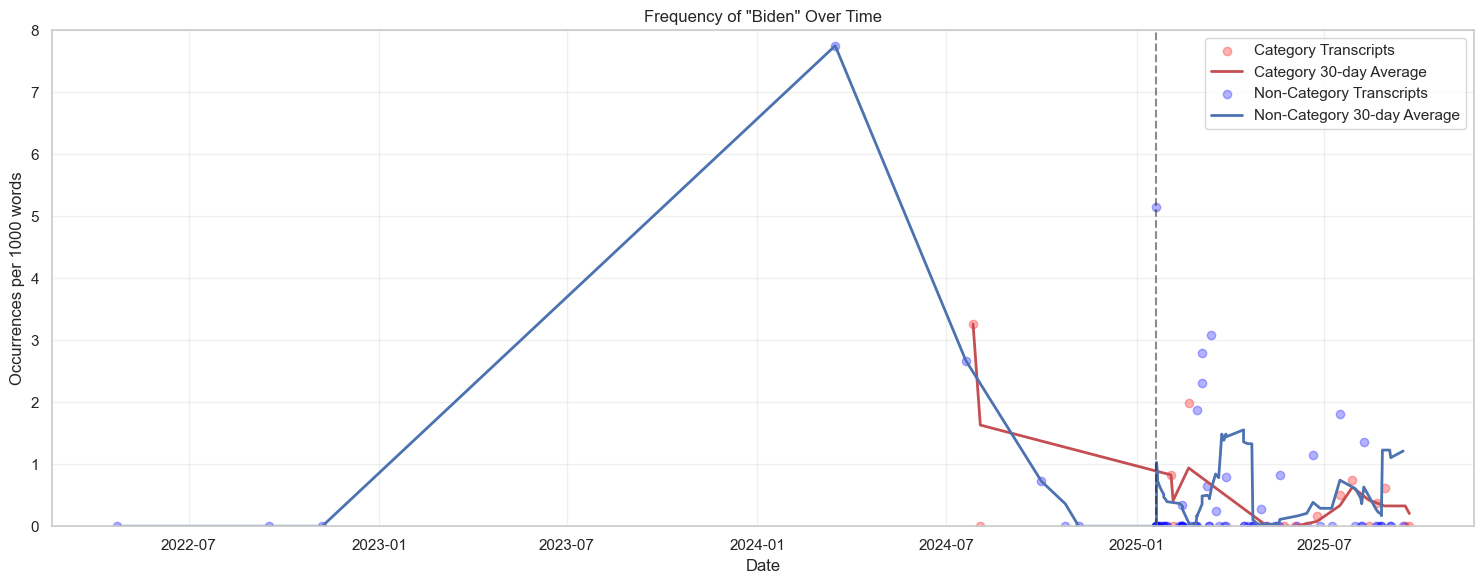


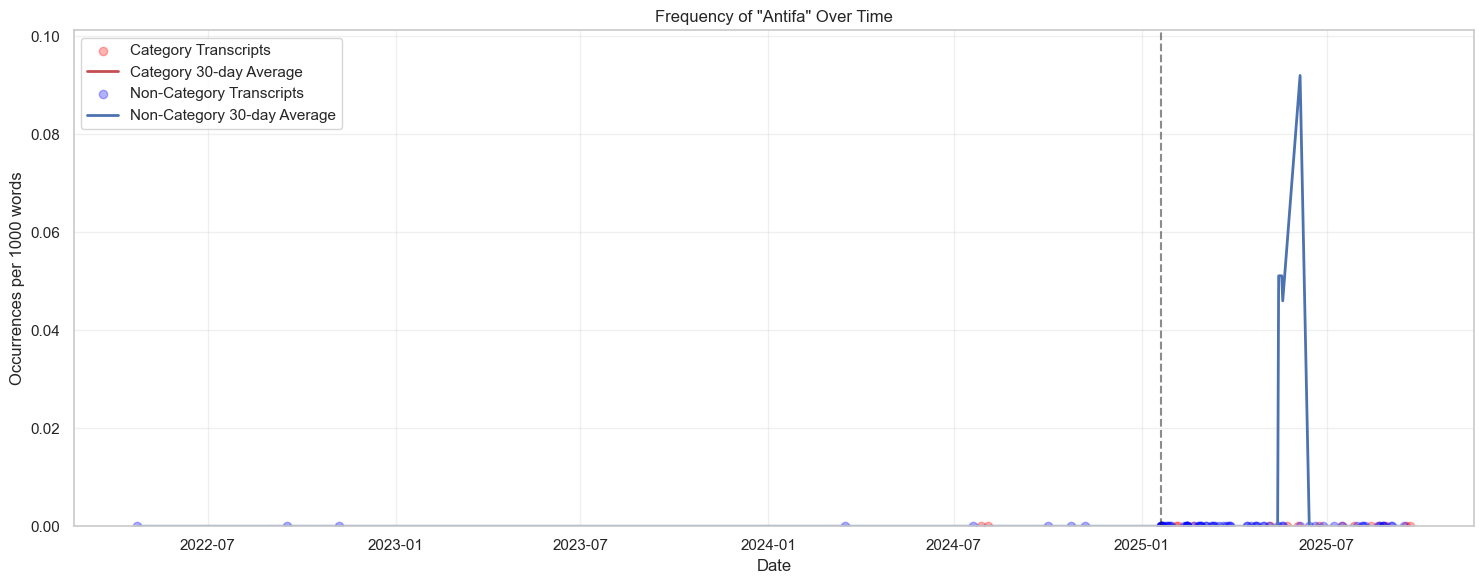


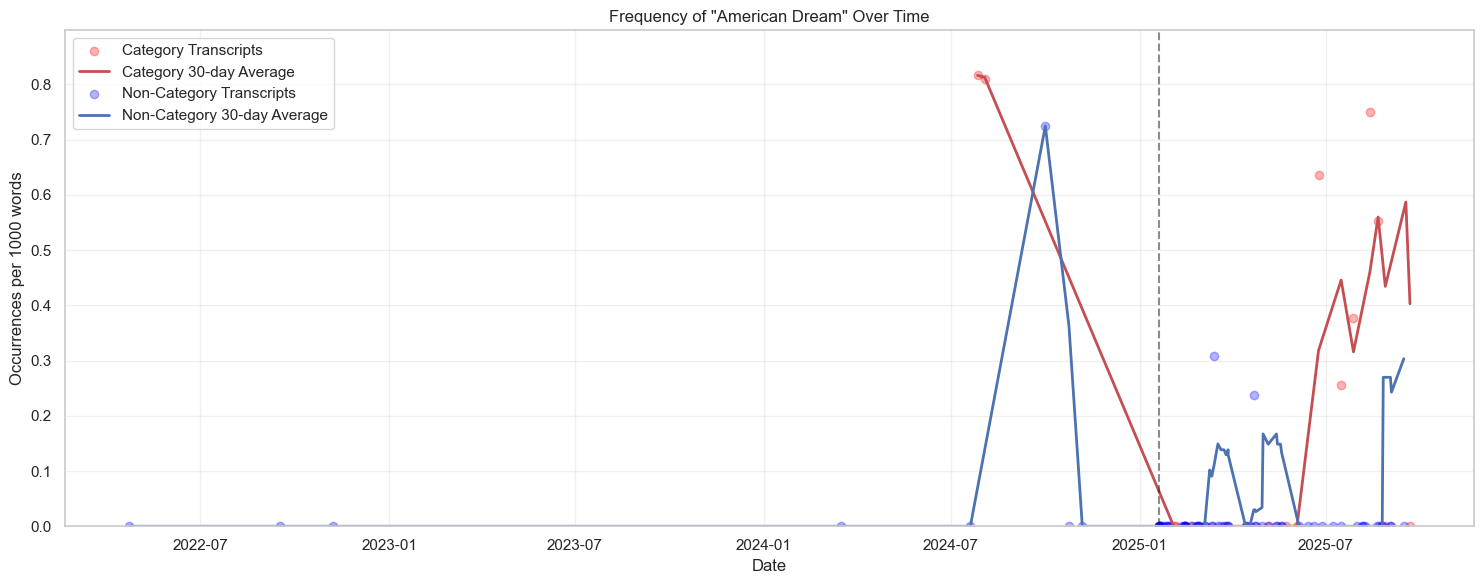


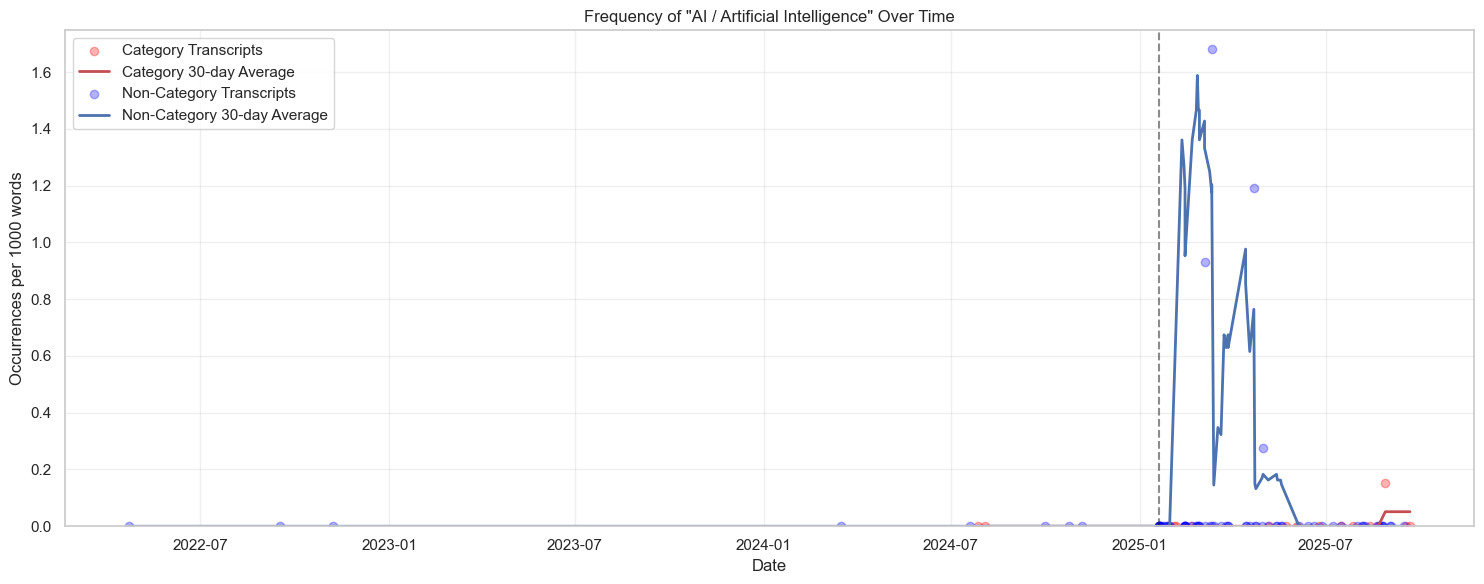

In [16]:

plot_phrase_frequency_over_time_all(df_category, df_non_category, SEARCH_PHRASES)

Expected length from category data: 3793 words


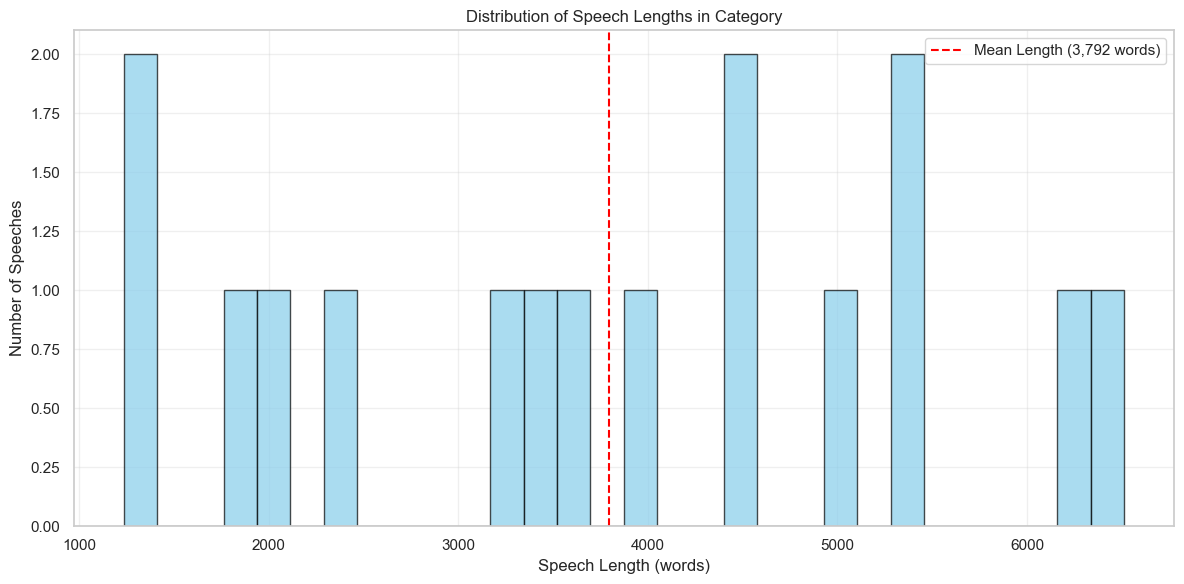

In [17]:
plot_length_distribution(df_category)

In [27]:
# Find all appearances with Keir Starmer and analyze phrase occurrences
analyze_files_phrase_occurrences(df[df['file'].str.contains('discusses|promotes')], SEARCH_PHRASES)


Found 5 matching files:

  2025-07-16_jd_vance_discusses_gop_fiscal_policy_in_west_pittston_pennsylvania.txt
  2025-07-28_jd_vance_promotes_administration_policies_in_canton_ohio.txt
  2025-08-21_jd_vance_promotes_gop_economic_policies_in_peachtree_city_georgia.txt
  2025-08-28_jd_vance_discusses_the_economy_in_la_crosse_wisconsin.txt
  2025-09-17_jd_vance_discusses_tax_savings_and_spending_cuts_in_howell_michigan.txt


Phrase occurrences across selected files (sorted by total occurrences):


/Users/jstenger/Documents/repos/kalshi-research/src/phrase_analysis.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phrase_rows['Total'] = phrase_rows[sort_columns].sum(axis=1)


,2025-07-16_jd_vance_discusses_gop_fiscal_policy_in_west_pittston_pennsylvania.txt,2025-07-28_jd_vance_promotes_administration_policies_in_canton_ohio.txt,2025-08-21_jd_vance_promotes_gop_economic_policies_in_peachtree_city_georgia.txt,2025-08-28_jd_vance_discusses_the_economy_in_la_crosse_wisconsin.txt,2025-09-17_jd_vance_discusses_tax_savings_and_spending_cuts_in_howell_michigan.txt,Average
Word Count,3921,5311,5426,6511,3310,4895.800000
Democrat,12,5,6,16,5,8.800000
Healthcare / Health care,2,7,9,22,0,8.000000
Overtime,4,9,5,7,2,5.400000
Charlie / Kirk,0,0,0,0,26,5.200000
DC / Capital,2,2,13,9,0,5.200000
Wage,3,4,4,4,5,4.000000
Border,9,3,4,2,0,3.600000
Manufacturing,4,3,1,7,2,3.400000
Energy,9,5,0,0,0,2.800000



Summary:
Total files processed: 5
Total word count: 24,479


## Poisson Predictions

The most naive approach is to use the past frequency of a phrase over a given time period to forecast the probability of a phrase occurring during the expected length of a future speech. Using the Poisson distribution, we assume each word is independent and identically distributed. This allows us to compute threshold probabilities for a phrase occurring a given number of times, which can be compared to the prediction market's implied probability. However, this approach does not account for the clear dependence between words in a speech. This approach can still be useful for analyzing mentions where mostly independent occurrences might be expected (America, God, etc.) 

In [19]:

# length = df_category['text_length'].mean()
length = 5750
print(f"Using length: {length} words")

# Calculate predictions from different data sources
predictions_all = calculate_poisson_predictions(df, length, SEARCH_PHRASES)
predictions_interviews = calculate_poisson_predictions(df_category, length, SEARCH_PHRASES)

print("Predictions based on all appearances:")
display(format_prediction_table(predictions_all))

print("\nPredictions based on speeches:")
display(format_prediction_table(predictions_interviews))

Using length: 5750 words
Predictions based on all appearances:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
25,Charlie / Kirk,10.47,1.820,267,100.0%
26,Border,5.84,1.016,149,99.7%
27,Biden,3.21,0.559,82,96.0%
18,Energy,3.14,0.545,80,95.7%
22,Democrat,3.06,0.532,78,95.3%
12,Manufacturing,2.90,0.504,74,94.5%
23,DC / Capital,2.74,0.477,70,93.6%
30,AI / Artificial Intelligence,2.51,0.436,64,91.9%
3,Wage,2.47,0.430,63,91.5%
16,Healthcare / Health care,2.00,0.348,51,86.5%



Predictions based on speeches:


,Phrase,Expected,Historical Rate,Total Historical,P(≥1)
25,Charlie / Kirk,7.20,1.252,76,99.9%
22,Democrat,5.50,0.956,58,99.6%
26,Border,5.40,0.939,57,99.5%
23,DC / Capital,4.26,0.742,45,98.6%
16,Healthcare / Health care,4.07,0.709,43,98.3%
27,Biden,3.22,0.560,34,96.0%
3,Wage,3.13,0.544,33,95.6%
8,Overtime,2.65,0.461,28,93.0%
18,Energy,2.56,0.445,27,92.3%
12,Manufacturing,2.46,0.428,26,91.5%


## Negative Binomial 

A more general model that accounts for overdispersion. The dispersion parameter r is estimated using the method of moments, and it controls how much extra variance there is compared to a Poisson distribution. As r approaches infinity, the negative binomial converges to a Poisson distribution (in practice we use r=100 to approximate this). Values closer to 0 indicate that the data is overdispersed.

In [20]:

# Calculate predictions using both models
# avg_speech_length = df['text_length'].mean() 
avg_speech_length = 5500

print("Negative Binomial Predictions based on all appearances:")
nb_predictions = calculate_negative_binomial_predictions(df, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions))

print(f"Negative Binomial Predictions based on {CATEGORY_OF_INTEREST} appearances:")
nb_predictions_interviews = calculate_negative_binomial_predictions(df_category, avg_speech_length, SEARCH_PHRASES)
display(format_prediction_table(nb_predictions_interviews))

Negative Binomial Predictions based on all appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
25,Charlie / Kirk,10.01,0.28,373.56,63.1%,0.471
26,Border,5.59,0.19,172.14,47.4%,0.324
27,Biden,3.08,0.10,97.27,29.3%,0.188
18,Energy,3.00,0.54,19.66,63.8%,0.364
22,Democrat,2.92,0.40,24.53,56.9%,0.327
12,Manufacturing,2.78,0.32,26.87,51.6%,0.295
23,DC / Capital,2.62,0.12,58.62,31.8%,0.194
30,AI / Artificial Intelligence,2.40,0.10,127.13,27.5%,0.169
3,Wage,2.36,0.30,21.29,47.7%,0.261
16,Healthcare / Health care,1.91,0.93,5.86,64.6%,0.281


Negative Binomial Predictions based on speech appearances:


,Phrase,Expected,Dispersion (r),Sample Variance,P(≥1),P(≥3)
25,Charlie / Kirk,6.89,0.10,1344.64,34.6%,0.247
22,Democrat,5.26,0.79,40.36,79.9%,0.554
26,Border,5.17,0.58,51.40,73.5%,0.499
23,DC / Capital,4.08,1.24,17.49,83.6%,0.545
16,Healthcare / Health care,3.90,0.68,26.20,72.7%,0.455
27,Biden,3.08,0.44,24.56,60.0%,0.349
3,Wage,2.99,1.99,7.48,83.9%,0.474
8,Overtime,2.54,1.00,8.94,71.8%,0.369
18,Energy,2.45,0.57,12.93,61.4%,0.321
12,Manufacturing,2.36,1.06,7.61,71.0%,0.349


## Recent Usage in context

In [26]:
get_recent_contexts_all(df, SEARCH_PHRASES)


=== Recent usage of 'Michael / Whatley' ===

Date: 2025-07-28 (speech)
Context: ...he house. Max, where are you? There's Max. Thank you. I didn't notice you with the hat.

Max was a critical part of getting that legislation across the finish line. I believe we also have Congressman Michael Rulli. Mike, good to see you man. We appreciate you. And though she's working in the statehouse and not in Washington DC, I believe we have state Senator Jane Timken. Jane, thank you for everything.
...

Date: 2025-07-28 (speech)
Context: ...t I got one thing I got to say, which is, you know who we don't have in the house right now? We do not have Congresswoman Amelia Sykes. Even though we're right on the border I believe of Amelia's and Michael's district, Amelia Sykes is not here today. And you know why she's not here today?

Because she's not celebrating no taxes on tips. She's not celebrating no taxes on overtime. She's not celebrating t...

Date: 2025-02-28 (remarks)
Context: ...ourse, I don't 

## Per-Speech Frequencies


In [23]:
get_per_appearance_frequency({'all': df, 'category': df_category}, SEARCH_PHRASES)

Percentage of Appearances Containing Each Phrase:


,all,category
Phrase,,
Biden,29.0%,50.0%
Border,28.0%,62.5%
DC / Capital,23.7%,50.0%
Wage,20.4%,56.2%
Manufacturing,20.4%,50.0%
China,19.4%,56.2%
Energy,19.4%,43.8%
Drug,19.4%,56.2%
Election,18.3%,43.8%
